<a href="https://colab.research.google.com/github/opanasyuzhenkova/university-portfolio/blob/main/6sem_lr7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 7

In [ ]:
import pandas as pd

data = pd.read_csv("ex1data2.csv")

# print(data)

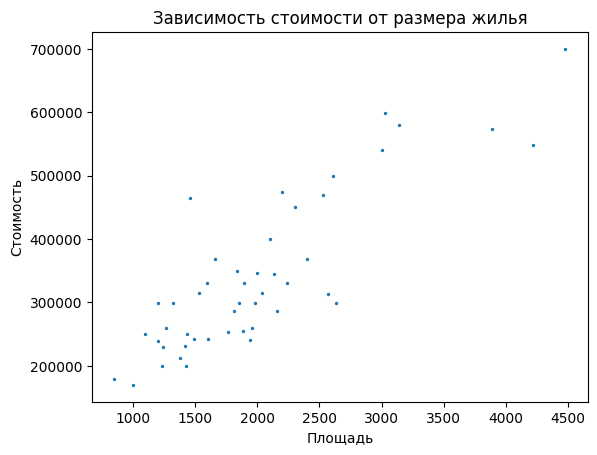

In [ ]:
# 1 - Визуализация
import numpy as np
import matplotlib.pyplot as plt

x = data['square_house']
y = data['cost']

plt.scatter(x, y, s=2)
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.title('Зависимость стоимости от размера жилья')
plt.autoscale(tight=False)
plt.show()

In [ ]:
# 2 - Линенйная модель, учитывающая только размер жилья

from sklearn import metrics

x = data['square_house'].values.reshape(-1, 1)
y = data['cost'].values


train_data,test_data = train_test_split(data, train_size=0.8, random_state=3)
reg = linear_model.LinearRegression()
x_train = np.array(train_data['square_house']).reshape(-1, 1)
y_train = np.array(train_data['cost']).reshape(-1, 1)
reg.fit(x_train,y_train)

x_test = np.array(test_data['square_house']).reshape(-1, 1)
y_test = np.array(test_data['cost']).reshape(-1, 1)


x_pred = np.array([[1650], [2200]])
y_pred = reg.predict(x_pred)

print('Предсказанные значения стоимости объектов недвижимости:')
for i in range(len(x_pred)):
    print('Для объекта {}: {}'.format(i+1, y_pred[i]))


Предсказанные значения стоимости объектов недвижимости:
Для объекта 1: [289965.95931498]
Для объекта 2: [363536.91687066]


In [ ]:
# 3 - Полиномиальная модель (степени 2 и 3), учитывающую только размер жилья.

from sklearn.preprocessing import PolynomialFeatures

# Подготовка данных
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

# Обучение полиномиальной модели (степень 2)
model_poly2 = LinearRegression()
model_poly2.fit(x_poly, y)

# Предсказание значений
x_pred_poly2 = poly_features.transform(x_pred)
y_pred_poly2 = model_poly2.predict(x_pred_poly2)

print('Предсказанные значения стоимости объектов недвижимости (полином, степень 2):')
for i in range(len(x_pred)):
    print('Для объекта {}: {}'.format(i+1, y_pred_poly2[i]))

# Подготовка данных
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)

# Обучение полиномиальной модели (степень 3)
model_poly3 = LinearRegression()
model_poly3.fit(x_poly, y)

# Предсказание значений
x_pred_poly3 = poly_features.transform(x_pred)
y_pred_poly3 = model_poly3.predict(x_pred_poly3)

print('Предсказанные значения стоимости объектов недвижимости (полином, степень 3):')
for i in range(len(x_pred)):
    print('Для объекта {}: {}'.format(i+1, y_pred_poly3[i]))




Предсказанные значения стоимости объектов недвижимости (полином, степень 2):
Для объекта 1: 293387.0848596068
Для объекта 2: 368112.5856422966
Предсказанные значения стоимости объектов недвижимости (полином, степень 3):
Для объекта 1: 285422.8280856648
Для объекта 2: 365824.7507114775


In [ ]:
# 4 - Линейная модель с учетом размера жилья и количества комнат

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train_data, test_data=train_test_split(data,train_size=0.8,random_state=3)

features =['square_house', 'number_of_rooms']
target = 'cost'

x = data[features].values.reshape(-1, len(features))
y = data[target].values

# x = data.loc[:, ('square_house', 'number_of_rooms')]
# y = data.loc[:, 'cost']

ols = linear_model.LinearRegression()
model = ols.fit(x, y)


x_pred_1 = np.array([1650, 3])
x_pred_1 = x_pred_1.reshape(-1, len(features))
print('Предсказанная стоимость для объекта 1: ', *model.predict(x_pred_1))

x_pred_2 = np.array([2220, 4])
x_pred_2 = x_pred_2.reshape(-1, len(features))
print('Предсказанная стоимость для объекта 2: ', *model.predict(x_pred_2))



Предсказанная стоимость для объекта 1:  293081.4643348961
Предсказанная стоимость для объекта 2:  363693.5294126148


In [ ]:
print('Линейная модель (только размер жилья):')
for i in range(len(x_pred)):
    print('Для объекта {}: {}'.format(i+1, *y_pred[i]))

print('Полиномиальная модель (степень 2):')
for i in range(len(x_pred)):
    print('Для объекта {}: {}'.format(i+1, y_pred_poly2[i]))

print('Полиномиальная модель (степень 3):')
for i in range(len(x_pred)):
    print('Для объекта {}: {}'.format(i+1, y_pred_poly3[i]))


Линейная модель (только размер жилья):
Для объекта 1: 289965.959314975
Для объекта 2: 363536.9168706558
Полиномиальная модель (степень 2):
Для объекта 1: 293387.0848596068
Для объекта 2: 368112.5856422966
Полиномиальная модель (степень 3):
Для объекта 1: 285422.8280856648
Для объекта 2: 365824.7507114775


###Анализ результатов:

Чем меньше значение ошибки (MSE), тем лучше модель.

1) Линейная модель имеет наибольшую ошибку, так как она представляет простую линейную зависимость между размером жилья и стоимостью. Этого недостаточно для точного предсказания.

2) Полиномиальные модели (степени 2 и 3), которые учитывают только размер жилья, будут иметь меньшую ошибку, так как они улавливают нелинейные зависимости между размером жилья и стоимостью.

3) Линейная модель, учитывающая размер жилья и количество комнат, будет иметь наименьшую ошибку, засчет того, что она учитывает дополнительный признак (количество комнат), что позволяет более точно предсказывать стоимость.
